# Decision tree classifier
- A decision tree implemented in Python.
- CART algorithm-based classifier

## 1. Import modules

In [1]:
# -*- coding: utf-8 -*-
"""
@author: hyeongyuy
"""
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
workingdir = r'C:\Users\yhg94\Desktop\DecisionTree'
os.chdir(os.path.join(workingdir, 'modules' ))
#sys.path.extend([os.path.abspath(".")])
from usertree import userTree as utr
import utils

## 2. Set parameters

In [2]:
# target attribute
target_att = 'target'

#model parameters
MAX_DEPTH = 100
sample_ratio = 0.01

os.chdir(os.path.join(workingdir))

## 3. Set directory & Load data

In [3]:
# load data
d_set = 'votes.csv'
data = pd.read_csv(os.path.join(workingdir, 'dataset', d_set))
colnm = data.columns
n_samples = round(sample_ratio * len(data))
in_feature = list(data.columns [data.columns != target_att])
X = data.loc[:, in_feature]
y = data.loc[:, target_att]

## split data
test_ratio = 0.2
X_train, X_test, _, _ = train_test_split(X, y, test_size=test_ratio, \
                stratify=y, shuffle =True)
train_idx, test_idx = X_train.index, X_test.index
train, test = data.loc[train_idx,:], data.loc[test_idx,:]
y_train = train['target']

## 4. Modeling

### 4-1. train

In [4]:
#criterion : entropy
entropy_tree_ins = utr(n_samples, MAX_DEPTH, params = ['entropy'])
entropy_tree, entropy_graph_tree = \
    entropy_tree_ins.fit(train, target_attribute_name = "target")
      
#criterion : gini
gini_tree_ins = utr(n_samples, MAX_DEPTH, params = ['gini'])
gini_tree, gini_graph_tree = \
    gini_tree_ins.fit(train, target_attribute_name = "target")
    

### 4-2. predict

In [5]:
#entropy
entropy_tree_pred, entropy_tree_pred_prob = \
    entropy_tree_ins.predict(test, entropy_tree)
#gini
gini_tree_pred, gini_tree_pred_prob = \
    gini_tree_ins.predict(test, gini_tree)

## 5. Check performance

In [6]:
entropy_tree_perform  = \
        utils.perform_check(test['target'],\
        entropy_tree_pred, entropy_tree_pred_prob, \
        entropy_tree_ins.NUM_CLASSES, \
        entropy_tree_ins.CLASS_DICT_, average='micro')
gini_tree_perform  = \
        utils.perform_check(test['target'],\
        gini_tree_pred, gini_tree_pred_prob, \
        gini_tree_ins.NUM_CLASSES, gini_tree_ins.CLASS_DICT_, average='micro')

perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str .format('entropy\n  ', \
                               *np.round(np.array(entropy_tree_perform), 3)))
print(perform_base_str .format('gini\n  ', \
                               *np.round(np.array(gini_tree_perform), 3)))


entropy
   : ACCURACY :0.954, RECALL :0.941, PRECISION : 0.941, F1 : 0.941, AUC : 0.996
gini
   : ACCURACY :0.954, RECALL :0.912, PRECISION : 0.969, F1 : 0.939, AUC : 0.996


## 6. Save & Load models

### 6-1. save model

In [7]:
sava_models_dir = 'models'
if not os.path.exists(sava_models_dir):
    os.makedirs(sava_models_dir)
model_dict ={}
model_dict['entropy'] = entropy_tree_ins
model_dict['gini'] = gini_tree_ins

utils.save_obj(model_dict, os.path.join(sava_models_dir , 'user_tree'))


### 6-2. load model

In [8]:
model_dict = utils.load_obj(os.path.join(sava_models_dir , 'user_tree'))
model_dict.keys()
entropy_tree2 = model_dict['entropy']
gini_tree2 = model_dict['gini']

### 6-3. check loaded model

In [9]:
#entropy
entropy_tree_pred2, entropy_tree_pred_prob2 = \
    entropy_tree2.predict(test, entropy_tree)
#gini
gini_tree_pred2, gini_tree_pred_prob2 = \
    gini_tree2.predict(test, gini_tree)

#performance check
entropy_tree_perform2  = \
        utils.perform_check(test['target'],\
        entropy_tree_pred2, entropy_tree_pred_prob2, \
        entropy_tree2.NUM_CLASSES, entropy_tree2.CLASS_DICT_, average='micro')
gini_tree_perform2  = \
        utils.perform_check(test['target'],\
        gini_tree_pred2, gini_tree_pred_prob2, \
        gini_tree2.NUM_CLASSES, gini_tree2.CLASS_DICT_, average='micro')

print(perform_base_str .format('entropy(saved model)\n  ', \
                               *np.round(np.array(entropy_tree_perform), 3)))
print(perform_base_str .format('entropy(loaded model)\n  ', \
                               *np.round(np.array(entropy_tree_perform2), 3)))
print(perform_base_str .format('gini(saved model)\n  ', \
                               *np.round(np.array(gini_tree_perform), 3)))
print(perform_base_str .format('gini(loaded model)\n  ', \
                               *np.round(np.array(gini_tree_perform2), 3)))


entropy(saved model)
   : ACCURACY :0.954, RECALL :0.941, PRECISION : 0.941, F1 : 0.941, AUC : 0.996
entropy(loaded model)
   : ACCURACY :0.954, RECALL :0.941, PRECISION : 0.941, F1 : 0.941, AUC : 0.996
gini(saved model)
   : ACCURACY :0.954, RECALL :0.912, PRECISION : 0.969, F1 : 0.939, AUC : 0.996
gini(loaded model)
   : ACCURACY :0.954, RECALL :0.912, PRECISION : 0.969, F1 : 0.939, AUC : 0.996


## 7. Visualization

In [10]:
import graphviz
graph_dir = 'graph'
#entropy
node, edge = entropy_tree_ins.graph.tree_to_graph(entropy_tree2.graph_tree)
entropy_tree_graph = graphviz.Source(node + edge+'\n}')
#gini
node, edge = gini_tree_ins.graph.tree_to_graph(gini_tree2.graph_tree)
gini_tree_graph = graphviz.Source(node + edge+'\n}')

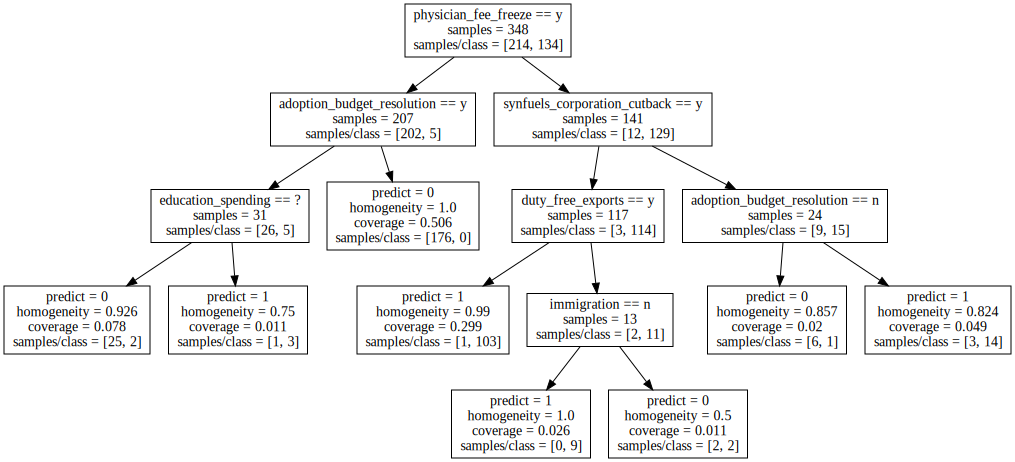

In [11]:
entropy_tree_graph

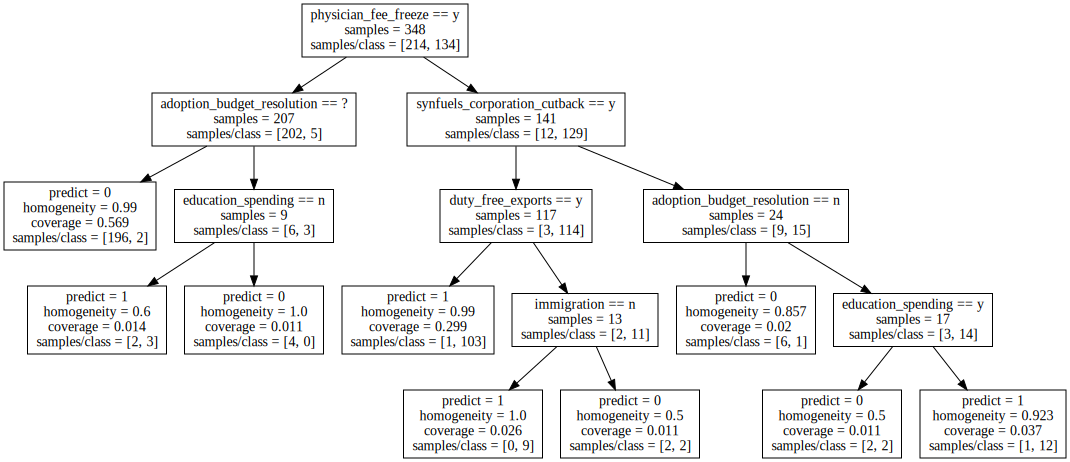

In [12]:
gini_tree_graph

## 8. Define a new splitting criterion
- If you want to define a new splitting criterion, you can override related methods. [ref modules/splitcriterion.py line114 ~ ]

In [13]:
#GainRatio(entropy)
entropy_GR_tree_ins = utr(n_samples, MAX_DEPTH, params = ['entropy_GR'])
entropy_GR_tree, entropy_GR_graph_tree = \
    entropy_GR_tree_ins.fit(train, target_attribute_name = "target")
#tsallis entropy
tsallis_tree_ins = utr(n_samples, MAX_DEPTH, params = ['tsallis', 2])
tsallis_tree, tsallis_graph_tree = \
    tsallis_tree_ins.fit(train, target_attribute_name = "target")
#Gainratio(tsallis)
tsallis_GR_tree_ins = utr(n_samples, MAX_DEPTH, params = ['tsallis_GR', 2])
tsallis_GR_tree, tsallis_GR_graph_tree = \
    tsallis_GR_tree_ins.fit(train, target_attribute_name = "target")
    
# predict
entropy_GR_tree_pred, entropy_GR_tree_pred_prob = \
    tsallis_GR_tree_ins.predict(test, entropy_GR_tree)
tsallis_tree_pred, tsallis_tree_pred_prob = \
    entropy_GR_tree_ins.predict(test, tsallis_tree)
tsallis_GR_tree_pred, tsallis_GR_tree_pred_prob = \
    tsallis_tree_ins.predict(test, tsallis_GR_tree)

## performance check
entropy_GR_tree_perform  = \
        utils.perform_check(test['target'],\
        entropy_GR_tree_pred, entropy_GR_tree_pred_prob, \
        entropy_GR_tree_ins.NUM_CLASSES, entropy_GR_tree_ins.CLASS_DICT_, average='micro')
        
tsallis_tree_perform  = \
        utils.perform_check(test['target'],\
        tsallis_tree_pred, tsallis_tree_pred_prob, \
        tsallis_tree_ins.NUM_CLASSES, tsallis_tree_ins.CLASS_DICT_, average='micro')
tsallis_GR_tree_perform  = \
        utils.perform_check(test['target'],\
        tsallis_GR_tree_pred, tsallis_GR_tree_pred_prob, \
        tsallis_GR_tree_ins.NUM_CLASSES, tsallis_GR_tree_ins.CLASS_DICT_, average='micro')
print(perform_base_str .format('entropy GainRatio\n  ', \
                               *np.round(np.array(entropy_GR_tree_perform), 3)))        
print(perform_base_str .format('tsallis\n  ', \
                               *np.round(np.array(tsallis_tree_perform), 3)))
print(perform_base_str .format('tsallis GainRatio\n  ', \
                               *np.round(np.array(tsallis_GR_tree_perform), 3)))


entropy GainRatio
   : ACCURACY :0.954, RECALL :0.912, PRECISION : 0.969, F1 : 0.939, AUC : 0.996
tsallis
   : ACCURACY :0.954, RECALL :0.912, PRECISION : 0.969, F1 : 0.939, AUC : 0.996
tsallis GainRatio
   : ACCURACY :0.954, RECALL :0.912, PRECISION : 0.969, F1 : 0.939, AUC : 0.996


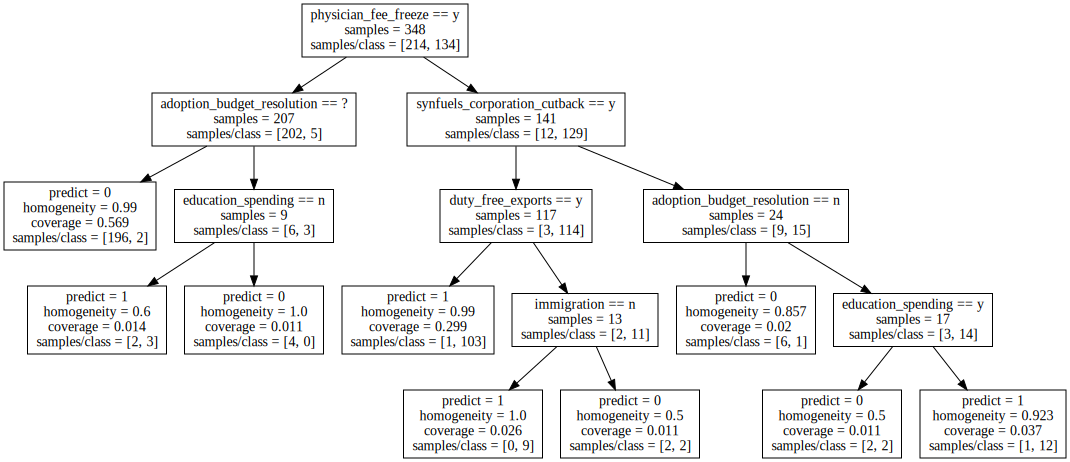

In [14]:
node, edge = tsallis_tree_ins.graph.tree_to_graph(tsallis_tree_ins.graph_tree)
tsallis_tree_graph = graphviz.Source(node + edge+'\n}')
tsallis_tree_graph.render('{}/tsallis_tree'.format(graph_dir))
tsallis_tree_graph

## 9. Get leaves information

In [15]:
#Information about all leaves
train_node_info = utils.get_usrt_info(train, tsallis_tree_ins, tsallis_tree, -1)
test_node_info = utils.get_usrt_info(test, tsallis_tree_ins, tsallis_tree, -1)
train_node_info

,depth,max_prob,sample_ratio
0,2,0.989899,0.568966
1,3,0.600000,0.014368
2,3,1.000000,0.011494
3,3,0.990385,0.298851
6,3,0.857143,0.020115
4,4,1.000000,0.025862
5,4,0.500000,0.011494
7,4,0.500000,0.011494
8,4,0.923077,0.037356


In [16]:
#Information about leaves below depth
depth = 3
train_CART_tsallis_sample_ratio, \
train_CART_tsallis_max_prob, \
CART_tsallis_N_rule \
    = utils.get_usrt_info(train, tsallis_tree_ins, tsallis_tree, depth )
test_CART_tsallis_sample_ratio, \
test_CART_tsallis_max_prob, _ \
    =utils.get_usrt_info(test, tsallis_tree_ins, tsallis_tree, depth)
base_str = '{}, sample_ratio : {}, max_probability : {}'
print('depth = ~{}'.format(depth))
print(base_str.format('train', \
          train_CART_tsallis_sample_ratio, train_CART_tsallis_max_prob))
print(base_str.format('test', \
          test_CART_tsallis_sample_ratio, test_CART_tsallis_max_prob))


depth = ~3
train, sample_ratio : 0.9137931034482759, max_probability : 0.9811320754717011
test, sample_ratio : 0.9310344827586207, max_probability : 0.986788931233375
